# Titanic<sub>An introduction to machine learning <sub>
[Home Page](https://www.kaggle.com/c/titanic)




<img src="https://i0.wp.com/intheboatshed.net/wp-content/uploads/2008/04/titanic_4.jpg" width="800px">

# Preliminaries

## Interesting Links

kaggle intern:
 - https://www.kaggle.com/alexisbcook/titanic-tutorial
 - https://www.kaggle.com/parulpandey/10-simple-hacks-to-speed-up-your-data-analysis#758058
 - https://www.kaggle.com/startupsci/titanic-data-science-solutions
 - https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic
 - https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous
 
 others:
 - https://pandas-profiling.github.io/pandas-profiling/docs/


## Settings

In [1]:
# settings
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
#To revert to the original setting :
# InteractiveShell.ast_node_interactivity = "last_expr"

## Imports

In [2]:
#imports
# os 
import os

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random 

# visualization and reporting
import pandas_profiling # dataframe profiling @
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calmap


# machine learning
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# walk file structure and find input data
input_files=[]
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        if path.endswith('submission.csv'):
            path_gs=path
        elif path.endswith('test.csv'):
            path_test=path
        elif path.endswith('train.csv'):
            path_train=path
print(path_gs,path_test,path_train)            

kaggle/input\gender_submission.csv kaggle/input\test.csv kaggle/input\train.csv


## DataFrame Creation

In [4]:
# create a dataframe for each csv file
test_df=pd.read_csv(path_test)
train_df=pd.read_csv(path_train)

combo=[test_df,train_df]

# Data Insight

## Fast report

In [5]:
# display
if False: # test report
    test_df.head()
    test_df.info()
    test_df.describe(include='all')
if True: # Train report
    train_df.head()
    train_df.info()
    #train_df.describe()
    train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Collyer, Miss. Marjorie ""Lottie""",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Missing values

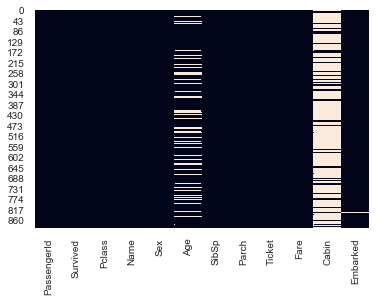

In [6]:
#heat map
sns.heatmap(train_df.isnull(), cbar=False)

## Full report

In [7]:
#profile report inline
if False: # Train Data report generation
    profile_train = train_df.profile_report(title='Titanic train data') 
    profile_train.to_file(output_file="kaggle/profile_report/Titanic_train_data.html") # save the report 
    profile_train # display inline
if False: # Test Data report generation
    profile_test = test_df.profile_report(title='Titanic test data')
    profile_test.to_file(output_file="kaggle/profile_report/Titanic_test_data.html") # save the report 
    profile_test # in order to display inline

To do: 
 1. **Name**: Get title 
 2. **Age**: 
     - Estimate missing value
     - get isChildren
 3. **Sibs** & **Parch**: Get FamillySize
 4. **Fare**: Estimate missing value
 5. **Embarked**: Estimate missing value
 6. **Tiket** and **Cabin**: erase 
 7. Idea

# Data Wrangling

## Name

### extract Title from Name

In [8]:
train_df['Surname'] = train_df.Name.str.split(',').str[0]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [9]:
# extract Title
for df in combo:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Surname'] = df.Name.str.split(',').str[0]
    
#display    
train_df[['Title','Survived']].groupby(['Title'],as_index=True).mean().sort_values(by='Survived',ascending=False).style.background_gradient(cmap='Reds')   

,Survived
Title,
Sir,1
Countess,1
Ms,1
Mme,1
Lady,1
Mlle,1
Mrs,0.792
Miss,0.697802
Master,0.575


### Regroup Title in Categories

In [10]:
for df in combo:
    #Rare Titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    #Miss, Mlle, Ms,Mme and so on
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
#display    
train_df[['Title','Survived']].groupby(['Title'],as_index=True).mean().sort_values(by='Survived',ascending=False).style.background_gradient(cmap='Reds')  

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575
Rare,0.347826
Mr,0.156673


## Sibs & Parch

In [11]:
for df in combo:
    df['FamilySize'] = df.SibSp + df.Parch + 1   
    #df.drop(['SibSp','Parch'],axis=True,inplace=True)

In [12]:
train_df[['FamilySize','Survived']].groupby('FamilySize',as_index=True).mean().sort_values('FamilySize',ascending=True).style.background_gradient(cmap='Reds')

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.2
6,0.136364
7,0.333333
8,0
11,0


In [13]:
for df in combo:
    df['FamilySize'] = df['FamilySize'].replace(6,5)
    df['FamilySize'] = df['FamilySize'].replace(7,5)
    df['FamilySize'] = df['FamilySize'].replace(8,5)
    df['FamilySize'] = df['FamilySize'].replace(9,5)
    df['FamilySize'] = df['FamilySize'].replace(10,5)
    df['FamilySize'] = df['FamilySize'].replace(11,5)

train_df[['FamilySize','Survived']].groupby('FamilySize',as_index=True).mean().sort_values('FamilySize',ascending=True).style.background_gradient(cmap='Reds')

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.16129


## Fare

In [14]:
test_df.loc[test_df.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,FamilySize
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,Storey,1


In [15]:
median_train=train_df.loc[(train_df.Pclass==3)&
             (train_df.Sex=='male')&
             (train_df.Embarked=='S')]['Fare'].median()
median_train

8.05

In [16]:
# replace missing value by median considering known information
test_df.loc[test_df.Fare.isna(),'Fare']=median_train

In [17]:
#check for more missing value
test_df.loc[test_df.Fare.isna()]['Fare'].sum()

0.0

## Embarked

### Missing Value

In [18]:
train_df.loc[train_df.Embarked.isna()]
test_df.loc[test_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,FamilySize


**Comment:**
 - The First class Ladies share a cabin and a Tiket but are not from the same family, probably friends allthough they have a significant age difference
 - Let's check the Fare statistic

In [19]:
train_df[['Pclass','Fare','Embarked']].dropna().groupby(['Pclass','Embarked'],as_index=True).describe()

Fare                                                    \
                 count        mean        std      min      25%      50%   
Pclass Embarked                                                            
1      C          85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
       Q           2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
       S         127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
2      C          17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
       Q           3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
       S         164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
3      C          66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
       Q          72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
       S         353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                                       
                        75%       max  
Pclass Embarked                        
1      C         110.883300  512.3292  
       Q          90.000000   90.0000  
       S          83.475000  263.0000  
2      C          37.004200   41.5792  
       Q          12.350000   12.3500  
       S          26.000000   73.5000  
3      C          14.458300   22.3583  
       Q          10.218725   29.1250  
       S          16.100000   69.5500

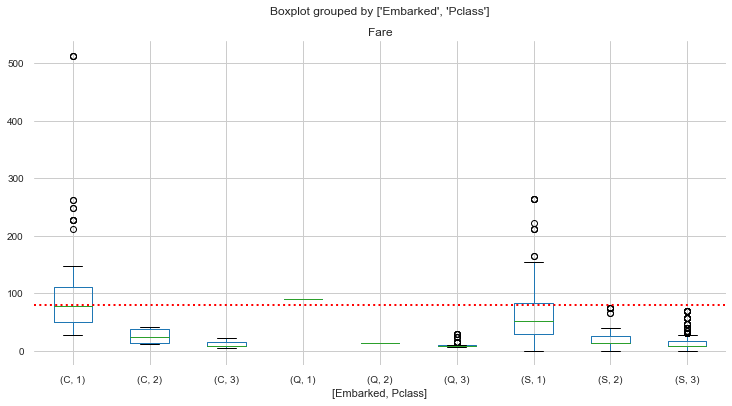

In [20]:
Fare_price=train_df.loc[train_df.PassengerId==62,'Fare'].values[0]
ax=train_df[['Pclass','Fare','Embarked']].dropna().boxplot(column='Fare',by=['Embarked','Pclass'],figsize=(12,6))
ax.axhline(y=Fare_price, color="red",linewidth=2,linestyle='dotted')

They would likly have Embarked in **Cherbourg** since:
- the median of C is about **80**, And have a significant 1st class embarkation
- Q have only embarked two 1st class its median is  90
- S 1st Class median is arround 50

In [21]:
#fill missing 
train_df.loc[train_df.Embarked.isna(),'Embarked']='C'

In [22]:
#check
train_df.loc[train_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FamilySize


## New Ideas

In [23]:
#Motherhood
train_df.loc[(train_df.Sex=='female')&
             (train_df.Parch!=0)&
             (train_df.Title=='Mrs')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FamilySize
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,3
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs,5
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs,2
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,3
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Chibnall,Mrs,2


In [24]:
for df in combo:
    df['isMother']='No'
    df.loc[(df.Sex=='female') & (df.Parch!=0) & (df.Title=='Mrs'),'isMother']='Yes'

In [25]:
# for categorical data only
#pd.crosstab(train_df.isMother, train_df.Survived)

In [26]:
train_df[['isMother', 'Survived']].groupby(['isMother'], as_index=True).mean().sort_values(by='Survived',ascending=False).style.background_gradient(cmap='Reds')

,Survived
isMother,
Yes,0.714286
No,0.361677


## Age

In [27]:
for df in combo:
    random.seed()
    test=df.loc[df.Age.isna()]
    train=df.loc[df.Age.isna()==False]

    Y_train=train["Age"].astype(int)
    features=['Pclass','Sex','Embarked','SibSp','Parch']
    X_train=pd.get_dummies(train[features])
    X_test=pd.get_dummies(test[features])
    
    #RFC
    RFC = RandomForestClassifier(n_estimators=1000,criterion='gini')
    RFC.fit(X_train, Y_train)
    predictions = RFC.predict(X_test)
    score=round(RFC.score(X_train, Y_train), 3)
    score
           
    df.loc[df.Age.isna(),'Age']=predictions
    
train_df.Age.isna().sum() + test_df.Age.isna().sum()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.304

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.217

0

In [28]:
#check
#train_df.Age.hist(bins=20,width=2)
#test['Age']=predictions
#test.Age.hist(bins=20,width=-2)
#sns.heatmap(test_df.isnull(), cbar=False)

### Child

In [29]:
Age_adulthood=18
for df in combo:
    df['Child'] = 'child'
    df.loc[df['Age']>=Age_adulthood,'Child']='adult'

In [30]:
train_df[['Child', 'Survived']].groupby(['Child'], as_index=True).mean().sort_values(by='Survived',ascending=False).style.background_gradient(cmap='Reds')

,Survived
Child,
child,0.543046
adult,0.351351


## Cleaning

### Ticket and Cabin

**Ticket** and **Cabin** Have So many uncertainties that they can not be of anymore Help

In [31]:
for df in combo:
    df.drop(['Ticket','Cabin'],axis=1,inplace=True)

**Name** , **SibSp**, **Parch** are no longer usefull

In [32]:
for df in combo:
    #df.drop(['Name','SibSp','Parch'],axis=1,inplace=True)
    df.drop(['Name'],axis=1,inplace=True)

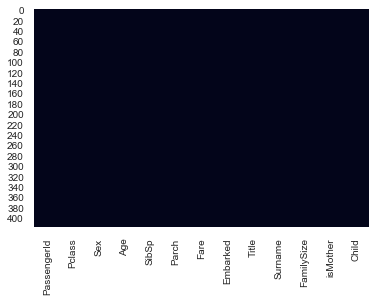

In [33]:
#check
sns.heatmap(train_df.isnull(), cbar=False)

sns.heatmap(test_df.isnull(), cbar=False)

# Machine learning

## Features

In [54]:
# all possible feature
Possible_features=train_df.columns.to_list()
Possible_features.remove('PassengerId')
Possible_features.remove('Survived')
print(Possible_features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Surname', 'Title', 'FamilySize', 'isMother', 'Child']


In [55]:
# remove feature
Possible_features.remove('Age')
#Possible_features.remove('Fare')
Possible_features.remove('Surname')
#Possible_features.remove('Title')
Possible_features.remove('Embarked')
#Possible_features.remove('FamilySize')
#Possible_features.remove('isMother')
#Possible_features.remove('Child')
Possible_features.remove('SibSp')
Possible_features.remove('Parch')
features=Possible_features
print(features)

['Pclass', 'Sex', 'Fare', 'Title', 'FamilySize', 'isMother', 'Child']


## Apply to Df

In [56]:
Y_train  = train_df["Survived"]
X_train  = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])
#X_train.head()
#X_test.head()

## RandomForestClassifier

### Model

In [57]:
#RFC
#random.seed()
model = RandomForestClassifier(n_estimators=100,random_state = 123,max_features = 'sqrt', max_leaf_nodes = 5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

### Score

In [58]:
#Score
round(model.score(X_train, Y_train)*100,2)

81.37

### Importance

,importance
feature,
Sex,39.4663
Title,35.2097
Pclass,10.4477
Fare,9.0724
FamilySize,4.06655
Child,1.66231
isMother,0.0749992


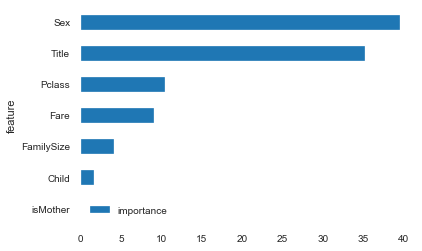

In [59]:
# importance
variable_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_*100})
variable_importance['feature']=variable_importance['feature'].str.split("_", n = 1, expand = True) 
variable_importance=variable_importance.groupby('feature',as_index=True).sum().sort_values(by='importance', ascending=True)
variable_importance.plot.barh()
variable_importance.sort_values(by='importance', ascending=False).style.background_gradient(cmap='Greens')

## Submit

In [40]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
#output.set_index('PassengerId',inplace=True)
#output.head()

In [41]:
output.to_csv('kaggle/output/my_ml_submission.csv', index=False)
#output.to_csv('my_ml_submission.csv', index=False)
